Executive Summary:

Microsoft wishes to get into the booming original video content market by launching Microsoft Studios. They want to capitalize on the growing demand for original video content by leveraging their technological expertise, brand strength, and financial resources. This analysis provides compelling insights that the head of Microsoft's new movie studio can use to establish a strong presence in the competitive entertainment industry and drive revenue growth for the company's success. Particularly focusing on Genre Fusion; those that are best rated, most watched, and making the most income.

1. Data processing

    1.1 Opening the datasets and Merging 

In [1]:
#Importing pandas library
import pandas as pd
#opening the first dataset that has title ratings
table1 =pd.read_csv("Downloads/imdb.title.ratings.csv.gz")

In [2]:
#Inspecting the first five lines
table1.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [3]:
#checking the number of rows and columns
table1.shape

(73856, 3)

In [4]:
#Importing the movie gross income
table2 =pd.read_csv("Downloads/bom.movie_gross (1).csv.gz")

In [5]:
#We check the first 5 rows
table2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
#Checking the Number of rows and columns
table2.shape

(3387, 5)

In [7]:
#importing the title basics dataset & openning it
table3 =pd.read_csv("Downloads/imdb.title.basics.csv.gz")

In [8]:
#inspecting the first 5 rows
table3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
#Checking Number of rows and columns in the dataset
table3.shape

(146144, 6)

In [10]:
table3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
# Merging Table1 & Table3
df1=table1.merge(table3, how="outer")
df1.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559.0,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20.0,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [12]:
#Dropping the original Title columns since we no longer need it
df1.drop("original_title", axis=1, inplace=True)

In [13]:
#Change the primary_title to just title to enable us merge it with
df1.rename(columns={'primary_title': 'title'}, inplace=True)
df1.head()

,tconst,averagerating,numvotes,title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559.0,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20.0,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352.0,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21.0,Até Onde?,2011,73.0,"Mystery,Thriller"


In [14]:
#Merging table2 and df1 to create the dataframe to work with. 
df=df1.merge(table2, how="outer")

In [15]:
#Inspecting the first 5 rows of our dataset
df.head()

,tconst,averagerating,numvotes,title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN,NaN,NaN
3,tt1042974,6.4,20.0,Just Inès,2010.0,90.0,Drama,NaN,NaN,NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014.0


In [16]:
#Checking the number of rows & columns
df.shape

(146927, 11)

In [17]:
#Check for the data types of each column and handle any inconsistencies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146927 entries, 0 to 146926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146146 non-null  object 
 1   averagerating    73858 non-null   float64
 2   numvotes         73858 non-null   float64
 3   title            146926 non-null  object 
 4   start_year       146146 non-null  float64
 5   runtime_minutes  114407 non-null  float64
 6   genres           140738 non-null  object 
 7   studio           4142 non-null    object 
 8   domestic_gross   4112 non-null    float64
 9   foreign_gross    2516 non-null    object 
 10  year             4147 non-null    float64
dtypes: float64(6), object(5)
memory usage: 12.3+ MB


In [18]:
#Check for missing values in each column
df.isnull().sum()

tconst                781
averagerating       73069
numvotes            73069
title                   1
start_year            781
runtime_minutes     32520
genres               6189
studio             142785
domestic_gross     142815
foreign_gross      144411
year               142780
dtype: int64

2. Data Cleaning 

In [19]:
#dropping the tconst column since its no longer needed and Year Column since there are two columns
df.drop(["tconst","year"],axis=1, inplace=True)

In [20]:
df.head()

,averagerating,numvotes,title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN,NaN
1,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN,NaN
2,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN,NaN
3,6.4,20.0,Just Inès,2010.0,90.0,Drama,NaN,NaN,NaN
4,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000


    2.1 Handling Missing Values


In [21]:
# We drop empty rows since most of them are as a result of merging the 3 tables each of a different shape
df=df.dropna()

In [22]:
#Renaming Columns to have easy meaning 
df.rename(columns={'averagerating': 'Rating', 'title':'Movie Title', 'numvotes':'Number of Votes', 'start_year':'Year', 'runtime_minutes':'Runtime(Minutes)', 'genres':'Genre', 'studio':'Studio', 'domestic_gross':'Domestic Gross Income','foreign_gross':'Foreign Gross Income'}, inplace=True)

In [23]:
df.head()

,Rating,Number of Votes,Movie Title,Year,Runtime(Minutes),Genre,Studio,Domestic Gross Income,Foreign Gross Income
4,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000
12,5.1,8296.0,Baggage Claim,2013.0,96.0,Comedy,FoxS,21600000.0,887000
19,7.6,326657.0,Moneyball,2011.0,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000
20,6.5,87288.0,Hereafter,2010.0,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000
22,7.4,428142.0,Mission: Impossible - Ghost Protocol,2011.0,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000


    2.2 Check for and handle any duplicate rows.

In [24]:
df.duplicated()

4        False
12       False
19       False
20       False
22       False
         ...  
78024    False
78118    False
78159    False
78303    False
78576    False
Length: 1767, dtype: bool

There are no empty rows

In [25]:
#Inspecting the data type on each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, 4 to 78576
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 1767 non-null   float64
 1   Number of Votes        1767 non-null   float64
 2   Movie Title            1767 non-null   object 
 3   Year                   1767 non-null   float64
 4   Runtime(Minutes)       1767 non-null   float64
 5   Genre                  1767 non-null   object 
 6   Studio                 1767 non-null   object 
 7   Domestic Gross Income  1767 non-null   float64
 8   Foreign Gross Income   1767 non-null   object 
dtypes: float64(5), object(4)
memory usage: 138.0+ KB


Foreign Gross Income Column needs to have numeric entries.

In [26]:
#Removing commas from Foreign Gross Income Column and converting the data to numeric
df['Foreign Gross Income'] = df['Foreign Gross Income'].str.replace(',', '')
df['Foreign Gross Income'] = pd.to_numeric(df['Foreign Gross Income'])

In [27]:
#Check for data consistency
assert df['Foreign Gross Income'].notnull().all()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, 4 to 78576
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 1767 non-null   float64
 1   Number of Votes        1767 non-null   float64
 2   Movie Title            1767 non-null   object 
 3   Year                   1767 non-null   float64
 4   Runtime(Minutes)       1767 non-null   float64
 5   Genre                  1767 non-null   object 
 6   Studio                 1767 non-null   object 
 7   Domestic Gross Income  1767 non-null   float64
 8   Foreign Gross Income   1767 non-null   float64
dtypes: float64(6), object(3)
memory usage: 138.0+ KB


In [29]:
#Introducing a new column for the total Income made from a movie
df["Total Gross Income"] =df['Domestic Gross Income'] + df['Foreign Gross Income']

In [30]:
df.head()

,Rating,Number of Votes,Movie Title,Year,Runtime(Minutes),Genre,Studio,Domestic Gross Income,Foreign Gross Income,Total Gross Income
4,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,61200000.0
12,5.1,8296.0,Baggage Claim,2013.0,96.0,Comedy,FoxS,21600000.0,887000.0,22487000.0
19,7.6,326657.0,Moneyball,2011.0,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,110200000.0
20,6.5,87288.0,Hereafter,2010.0,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,105200000.0
22,7.4,428142.0,Mission: Impossible - Ghost Protocol,2011.0,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0,694700000.0


3. Exploratory Data Analysis

In [31]:
#Getting the Movie with the Highest Votes meaning its the most watched.
df.sort_values(by="Number of Votes", ascending=False)

,Rating,Number of Votes,Movie Title,Year,Runtime(Minutes),Genre,Studio,Domestic Gross Income,Foreign Gross Income,Total Gross Income
68930,8.8,1841066.0,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",WB,292600000.0,535700000.0,8.283000e+08
10649,8.4,1387769.0,The Dark Knight Rises,2012.0,164.0,"Action,Thriller",WB,448100000.0,636800000.0,1.084900e+09
29304,8.6,1299334.0,Interstellar,2014.0,169.0,"Adventure,Drama,Sci-Fi",Par.,188000000.0,489400000.0,6.774000e+08
43365,8.4,1211405.0,Django Unchained,2012.0,165.0,"Drama,Western",Wein.,162800000.0,262600000.0,4.254000e+08
44692,8.2,1035358.0,The Wolf of Wall Street,2013.0,180.0,"Biography,Crime,Drama",Par.,116900000.0,275100000.0,3.920000e+08
...,...,...,...,...,...,...,...,...,...,...
20211,4.0,6.0,Monsters,2015.0,87.0,Horror,Magn.,237000.0,4000000.0,4.237000e+06
1307,6.2,6.0,Nerve,2015.0,62.0,"Documentary,History",LGF,38600000.0,46700000.0,8.530000e+07
34600,3.8,5.0,The Other Side of the Door,2014.0,90.0,Drama,Fox,3000000.0,11300000.0,1.430000e+07
9220,6.0,5.0,Buried,2011.0,95.0,Thriller,LGF,1000000.0,18100000.0,1.910000e+07


In [32]:
# Getting top 10 most watched movies
df4=df.sort_values(by="Number of Votes", ascending=False).head(10)
df4

,Rating,Number of Votes,Movie Title,Year,Runtime(Minutes),Genre,Studio,Domestic Gross Income,Foreign Gross Income,Total Gross Income
68930,8.8,1841066.0,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",WB,292600000.0,535700000.0,8.283000e+08
10649,8.4,1387769.0,The Dark Knight Rises,2012.0,164.0,"Action,Thriller",WB,448100000.0,636800000.0,1.084900e+09
29304,8.6,1299334.0,Interstellar,2014.0,169.0,"Adventure,Drama,Sci-Fi",Par.,188000000.0,489400000.0,6.774000e+08
43365,8.4,1211405.0,Django Unchained,2012.0,165.0,"Drama,Western",Wein.,162800000.0,262600000.0,4.254000e+08
44692,8.2,1035358.0,The Wolf of Wall Street,2013.0,180.0,"Biography,Crime,Drama",Par.,116900000.0,275100000.0,3.920000e+08
3989,8.1,1005960.0,Shutter Island,2010.0,138.0,"Mystery,Thriller",Par.,128000000.0,166800000.0,2.948000e+08
30249,8.1,948394.0,Guardians of the Galaxy,2014.0,121.0,"Action,Adventure,Comedy",BV,333200000.0,440200000.0,7.734000e+08
66036,8.0,820847.0,Deadpool,2016.0,108.0,"Action,Adventure,Comedy",Fox,363100000.0,420000000.0,7.831000e+08
68939,7.2,795227.0,The Hunger Games,2012.0,142.0,"Action,Adventure,Sci-Fi",LGF,408000000.0,286400000.0,6.944000e+08
4046,8.1,780910.0,Mad Max: Fury Road,2015.0,120.0,"Action,Adventure,Sci-Fi",WB,153600000.0,224800000.0,3.784000e+08


In [33]:
df[["Rating","Number of Votes", "Runtime(Minutes)","Total Gross Income"]].describe()

,Rating,Number of Votes,Runtime(Minutes),Total Gross Income
count,1767.000000,1.767000e+03,1767.000000,1.767000e+03
mean,6.459706,9.692010e+04,107.895869,1.296768e+08
std,0.991033,1.539057e+05,20.105904,2.103367e+08
min,1.600000,5.000000e+00,3.000000,1.080000e+04
25%,5.900000,6.392500e+03,95.000000,1.018610e+07
50%,6.500000,3.987000e+04,106.000000,4.840000e+07
75%,7.100000,1.171330e+05,119.000000,1.481000e+08
max,9.200000,1.841066e+06,272.000000,1.405400e+09


    3.1 Visualization

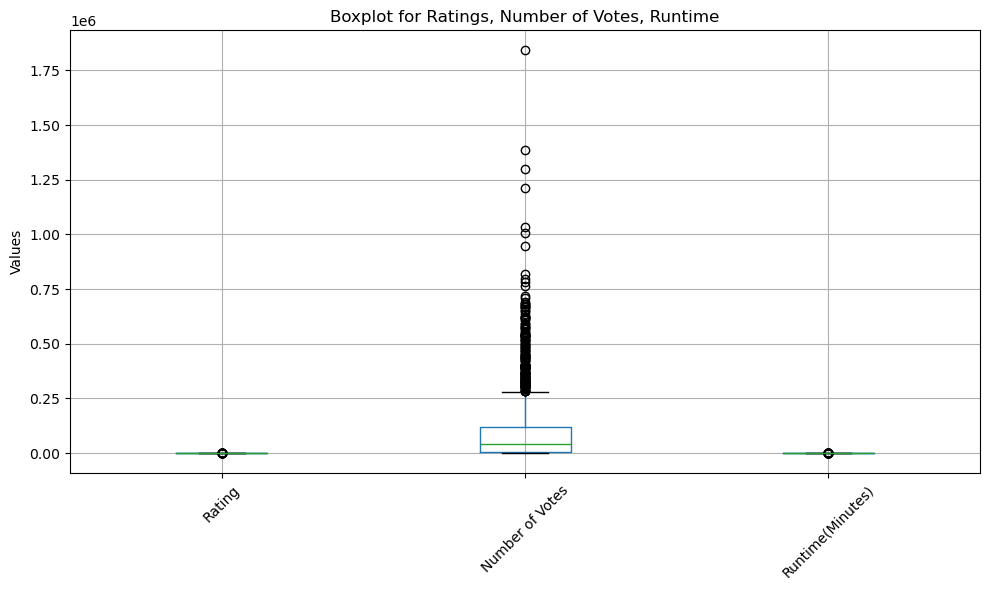

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.boxplot(column=["Rating", "Number of Votes", "Runtime(Minutes)"])
plt.title('Boxplot for Ratings, Number of Votes, Runtime')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Plotting a bar graph of top 10 Most watched Movies and their rating 

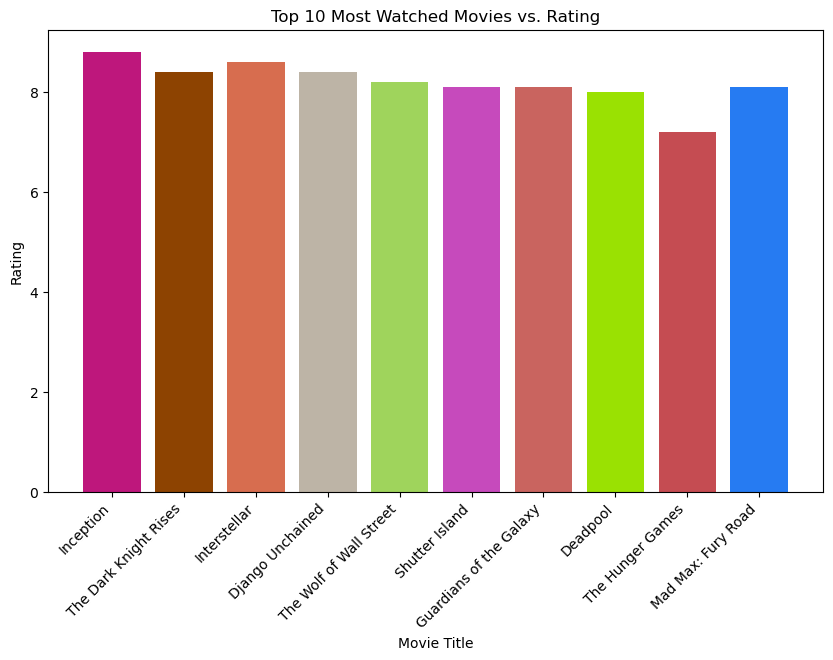

In [35]:
import numpy as np
num_movies = len(df4)
colors = np.random.rand(num_movies, 3)
plt.figure(figsize=(10, 6))
plt.bar(df4['Movie Title'], df4['Rating'], color=colors)
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('Top 10 Most Watched Movies vs. Rating')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
plt.show()

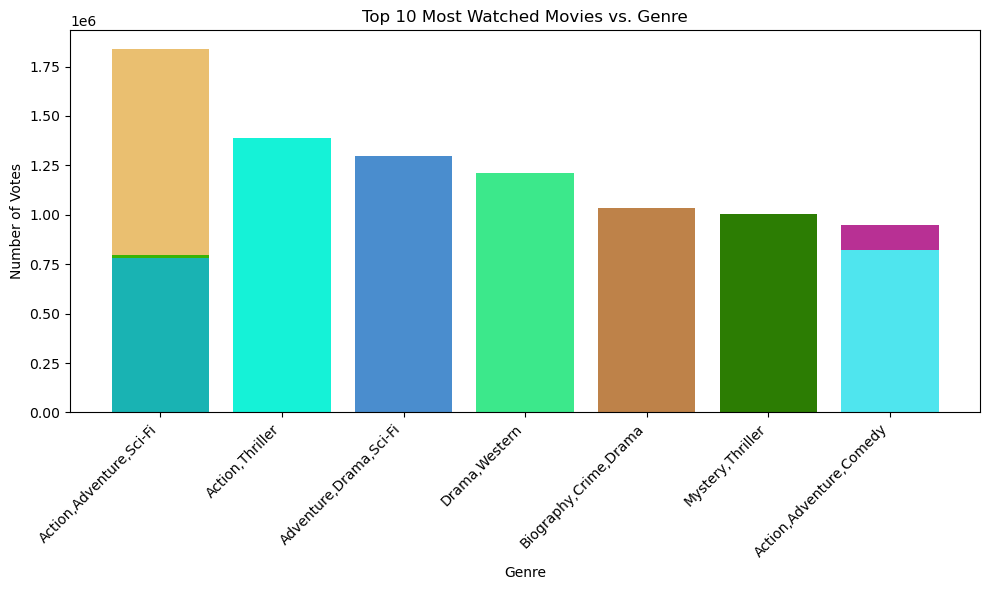

In [37]:
plt.figure(figsize=(10, 6))
num_movies = len(df4)
colors = np.random.rand(num_movies, 3)
plt.bar(df4['Genre'], df4['Number of Votes'], color=colors)
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.title('Top 10 Most Watched Movies vs. Genre\n')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Plotting a bar graph of top 10 Most watched Movies Genre and the Total Gross Income they made

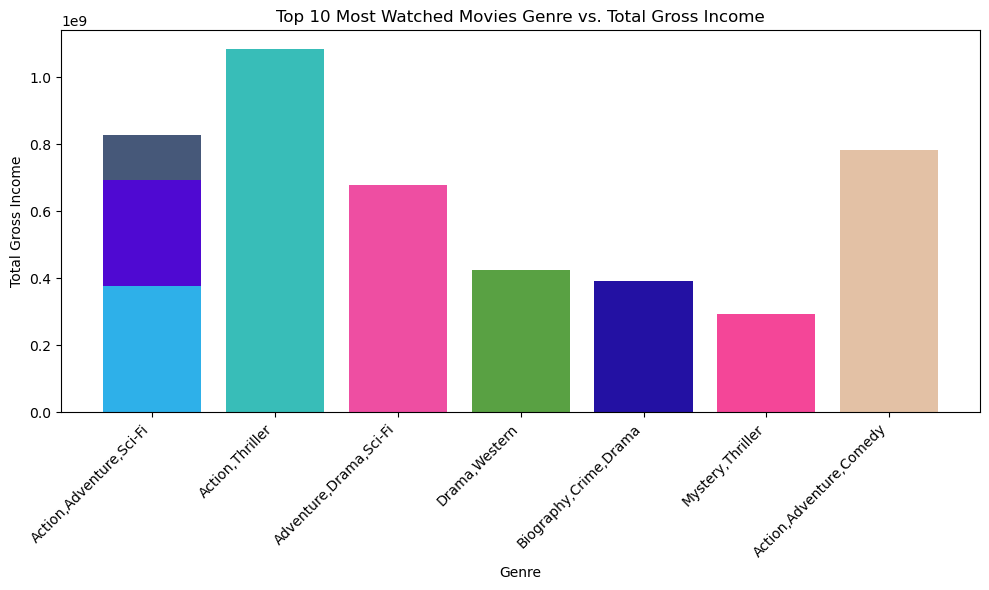

In [37]:
plt.figure(figsize=(10, 6))
num_movies = len(df4)
colors = np.random.rand(num_movies, 3)
plt.bar(df4['Genre'], df4['Total Gross Income'], color=colors)
plt.xlabel('Genre')
plt.ylabel('Total Gross Income')
plt.title('Top 10 Most Watched Movies Genre vs. Total Gross Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

DGI_FGI = df[["Domestic Gross Income", "Foreign Gross Income"]]
sns.pairplot(DGI_FGI)

In [38]:
#Most produced Genre
df["Genre"].value_counts()

Genre
Drama                         115
Comedy,Drama                   73
Adventure,Animation,Comedy     72
Comedy,Drama,Romance           66
Drama,Romance                  61
                             ... 
Adventure,Drama,Mystery         1
Action,Horror,Thriller          1
Animation,Biography,Drama       1
Action,Animation,Drama          1
Adventure,Comedy,Western        1
Name: count, Length: 260, dtype: int64

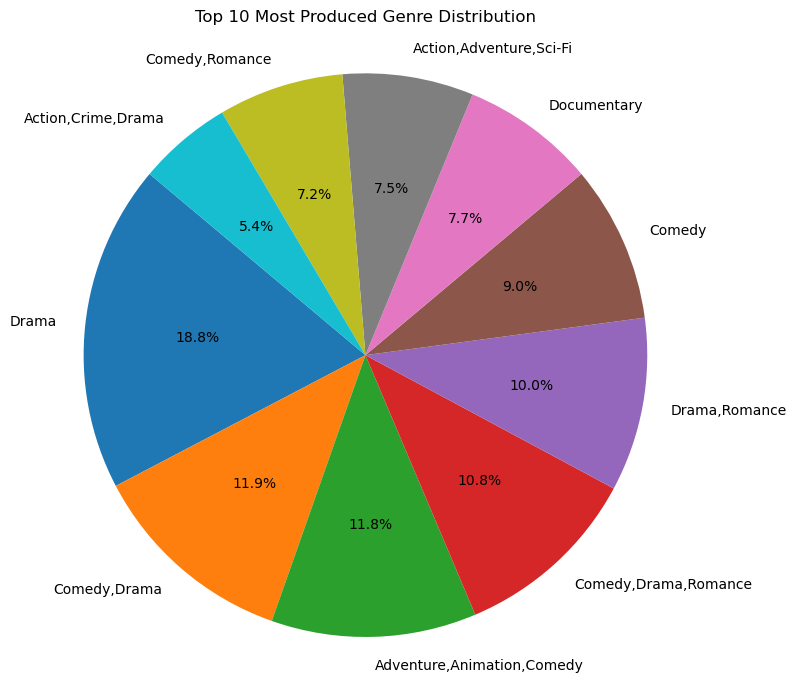

In [39]:
genre_counts = df["Genre"].value_counts().head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Produced Genre Distribution\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [40]:
# Getting the best rated movies
df.sort_values(by="Rating", ascending=False).head(10)

,Rating,Number of Votes,Movie Title,Year,Runtime(Minutes),Genre,Studio,Domestic Gross Income,Foreign Gross Income,Total Gross Income
21323,9.2,8.0,The Wall,2010.0,78.0,Documentary,RAtt.,1800000.0,2700000.0,4500000.0
2841,9.2,47.0,The Runaways,2019.0,108.0,Adventure,App.,3600000.0,1100000.0,4700000.0
5724,8.8,2067.0,Burn the Stage: The Movie,2018.0,84.0,"Documentary,Music",Trafalgar,4200000.0,16100000.0,20300000.0
68930,8.8,1841066.0,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",WB,292600000.0,535700000.0,828300000.0
2144,8.7,17.0,Eyes Wide Open,2010.0,110.0,"Documentary,History",NAV,26300.0,250000.0,276300.0
40796,8.7,1347.0,Coriolanus,2014.0,192.0,"Drama,History,War",Wein.,757000.0,315000.0,1072000.0
29304,8.6,1299334.0,Interstellar,2014.0,169.0,"Adventure,Drama,Sci-Fi",Par.,188000000.0,489400000.0,677400000.0
76567,8.6,55318.0,Senna,2010.0,106.0,"Biography,Documentary,Sport",PDA,1600000.0,6600000.0,8200000.0
56987,8.6,46.0,Kin,2012.0,45.0,"Drama,Music",LGF,5700000.0,4300000.0,10000000.0
76987,8.5,670926.0,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",BV,678800000.0,1369.5,678801369.5


Going By the Number of votes we can not say the highest rated movie as the best movie.

In [41]:
#Most preffered Studios
df["Studio"].value_counts()

Studio
Uni.         152
Fox          133
WB           112
BV            91
Par.          84
            ... 
Good Deed      1
VE             1
HC             1
Da.            1
LD             1
Name: count, Length: 146, dtype: int64

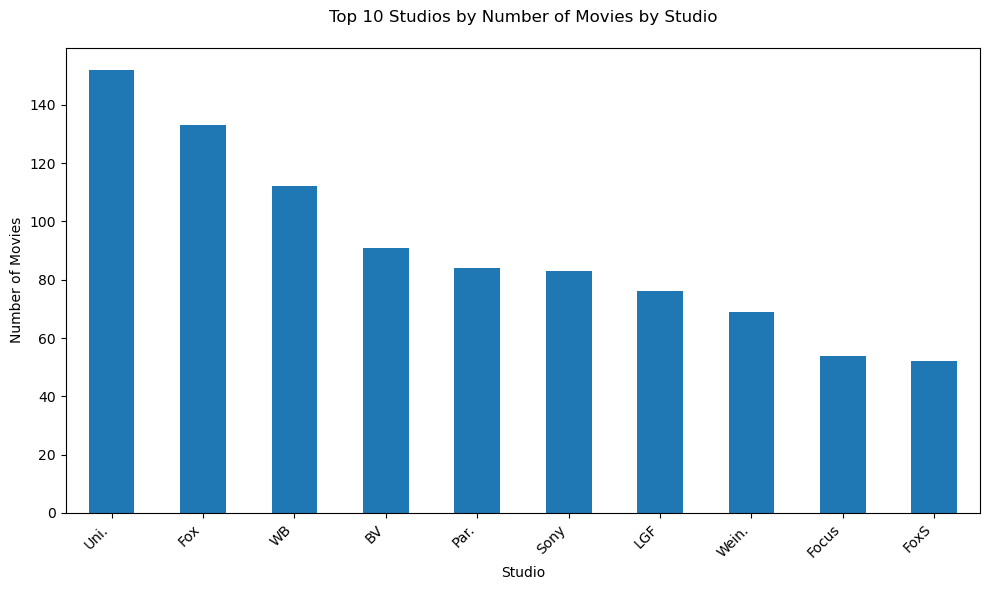

In [42]:
plt.figure(figsize=(10, 6))
studio_counts =df["Studio"].value_counts().head(10)
studio_counts.plot(kind='bar')
plt.title('Top 10 Studios by Number of Movies by Studio\n')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

4. Summary and Insight


    4.1 Conclusion
    
From the analysis above, Action, Adventure, and Sci_Fi Movies Genre are the most preferred where action movies make the most income. As observed, the movie Inception made the most income. In addition, Drama movies seem to be the most produced followed by Comedy although it does not make the most income. Universal Movies Studios seems to have the most watched movies.

    4.2 Recommendations
Launching Microsoft Studios presents a lucrative opportunity to enter the booming video content market as per the above findings. By leveraging Microsoft's strengths, they can produce Action,Adventure, SciFi Movies that are around one hour and a half long since they are the best performingbut also try comedy for diversification. Microsoft also needs to pay close attention to its competitors more so Universal Movies since they have the most watched movies. 